In [5]:
import pandas as pd
car = pd.read_csv('CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

x = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [6]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

reg = RandomForestRegressor()
pred = reg.fit(x_train,y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test,y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	4096553.937
MAE	1325.463
RMSE	2023.995
ACC	93.214%


In [7]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.003639
1          carheight     0.003829
2          carlength     0.007932
3           carwidth     0.020014
4            citympg     0.005280
5   compressionratio     0.004443
6         curbweight     0.187626
7         enginesize     0.668302
8         highwaympg     0.050972
9         horsepower     0.023220
10           peakrpm     0.007148
11            stroke     0.004001
12         wheelbase     0.013594


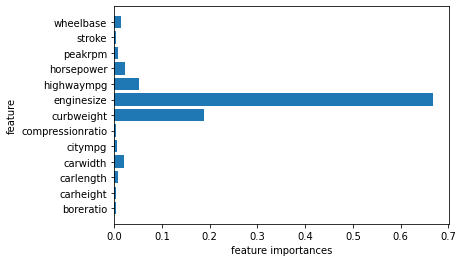

In [10]:
import matplotlib.pyplot as plt

n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features),importances, align = 'center')
plt.yticks(np.arange(n_features),column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')

plt.ylim(-1,n_features)
plt.show()